In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

%matplotlib inline

### AI, ML, Data Scientist, Big Data Jobs 

https://www.kaggle.com/datasets/joyshil0599/data-science-jobs-comprehensive-dataset

In [2]:
df = pd.read_csv('/work/AI ML DS & Big Data Jobs.csv', encoding='latin-1')

In [3]:
df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [4]:
#Number of rows and columns
df.shape

(3198, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


In [6]:
df.describe()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
count,3197,3197,3197,3197,2962,3009,3198,3198
unique,1106,2138,1117,3,4,218,2600,777
top,Publicis Groupe,Data Engineer,"Bengaluru, India",Full Time,Senior-level,115K+ *,"Big Data,Business Intelligence,Data analysis,E...",",,,,"
freq,126,105,90,3116,1876,253,12,542


### Rename the columns

In [7]:
df.columns=['Company','JobTitle','Location','JobType','ExperienceLevel','Salary','JobRequirements','JobBenefits']

In [8]:
df.head()

,Company,JobTitle,Location,JobType,ExperienceLevel,Salary,JobRequirements,JobBenefits
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


### Nulls checking

In [9]:
print(df.isnull().sum())

Company              1
JobTitle             1
Location             1
JobType              1
ExperienceLevel    236
Salary             189
JobRequirements      0
JobBenefits          0
dtype: int64


### Drop nulls in Company,JobTitle,JobType

In [10]:
df.dropna(subset=['Company','JobTitle','JobType','Salary'],axis=0,inplace=True)
print(df.isnull().sum())

Company              0
JobTitle             0
Location             0
JobType              0
ExperienceLevel    232
Salary               0
JobRequirements      0
JobBenefits          0
dtype: int64


### Filling nulls in Experience level with 'Not Specified'

In [11]:
print(df.ExperienceLevel.unique())

['Entry-level' nan 'Mid-level' 'Senior-level' 'Executive-level']


In [12]:
df['ExperienceLevel'].fillna('Not Specified',inplace=True)
print(df.ExperienceLevel.unique())
print(df.isnull().sum())

['Entry-level' 'Not Specified' 'Mid-level' 'Senior-level'
 'Executive-level']
Company            0
JobTitle           0
Location           0
JobType            0
ExperienceLevel    0
Salary             0
JobRequirements    0
JobBenefits        0
dtype: int64


### Change the Values of Salary to numeric data type

In [13]:
print(df['Salary'].unique())

[' 48K+ *' ' 90K+ *' ' 108K+' ' 184K+' ' 39K+ *' ' 140K+' ' 40K+ *'
 ' 80K+ *' ' 35K+ *' ' 62K+ *' ' 159K+' ' 97K+' ' 92K+ *' ' 129K+ *'
 ' 115K+ *' ' 44K+ *' ' 73K+ *' ' 59K+ *' ' 106K+' ' 105K+ *' ' 55K+ *'
 ' 110K+ *' ' 63K+ *' ' 49K+ *' ' 180K+' ' 127K+' ' 60K+' ' 45K+ *'
 ' 135K+' ' 69K+ *' ' 176K+' ' 65K+ *' ' 51K+ *' ' 67K+' ' 104K+' ' 105K+'
 ' 166K+' ' 131K+ *' ' 115K+' ' 43K+' ' 81K+ *' ' 96K+ *' ' 56K+ *'
 ' 130K+' ' 131K+' ' 50K+ *' ' 100K+' ' 60K+ *' ' 52K+' ' 135K+ *' ' 76K+'
 ' 172K+' ' 119K+' ' 125K+' ' 116K+' ' 77K+ *' ' 74K+ *' ' 70K+ *'
 ' 120K+' ' 189K+' ' 149K+' ' 110K+' ' 90K+' ' 30K+ *' ' 167K+' ' 236K+'
 ' 179K+' ' 80K+' ' 200K+' ' 139K+' ' 129K+' ' 113K+' ' 150K+' ' 158K+'
 ' 40K+' ' 184K+ *' ' 133K+' ' 78K+' ' 36K+ *' ' 122K+ *' ' 81K+' ' 59K+'
 'EUR 81K' ' 190K+' ' 72K+' ' 136K+' ' 102K+ *' ' 31K+ *' ' 89K+ *'
 ' 156K+' ' 107K+' ' 199K+' ' 224K+' ' 142K+' 'GBP 35K' ' 183K+' ' 164K+'
 'EUR 130K+' ' 174K+' ' 84K+' ' 79K+' ' 103K+ *' ' 143K+' ' 175K+'
 ' 170K+' 

In [14]:
df['Salary'] = df['Salary'].apply(lambda x: re.sub(r'[^0-9]', '',str(x)))
print(df['Salary'].unique())

['48' '90' '108' '184' '39' '140' '40' '80' '35' '62' '159' '97' '92'
 '129' '115' '44' '73' '59' '106' '105' '55' '110' '63' '49' '180' '127'
 '60' '45' '135' '69' '176' '65' '51' '67' '104' '166' '131' '43' '81'
 '96' '56' '130' '50' '100' '52' '76' '172' '119' '125' '116' '77' '74'
 '70' '120' '189' '149' '30' '167' '236' '179' '200' '139' '113' '150'
 '158' '133' '78' '36' '122' '190' '72' '136' '102' '31' '89' '156' '107'
 '199' '224' '142' '183' '164' '174' '84' '79' '103' '143' '175' '170'
 '141' '283' '151' '111' '148' '204' '202' '295' '68' '195' '145' '267'
 '109' '310' '153' '154' '86' '207' '85' '66' '315' '160' '144' '245'
 '126' '182' '157' '214' '173' '42' '112' '124' '185' '147' '146' '165'
 '75' '163' '193' '218' '230' '168' '134' '225' '253' '83' '235' '187'
 '227' '61' '171' '234' '155' '71' '94' '57' '197' '82' '177' '93' '121'
 '152' '161' '132' '138' '196' '205' '178' '95' '33' '54' '98' '99' '220'
 '128' '123' '117']


In [15]:
df['Salary'] = df['Salary']+('000')

In [16]:
df['Salary'] = pd.to_numeric(df['Salary'])


In [17]:
print(df.Salary.dtype)

int64


In [18]:
print(df['Salary'].unique())

[ 48000  90000 108000 184000  39000 140000  40000  80000  35000  62000
 159000  97000  92000 129000 115000  44000  73000  59000 106000 105000
  55000 110000  63000  49000 180000 127000  60000  45000 135000  69000
 176000  65000  51000  67000 104000 166000 131000  43000  81000  96000
  56000 130000  50000 100000  52000  76000 172000 119000 125000 116000
  77000  74000  70000 120000 189000 149000  30000 167000 236000 179000
 200000 139000 113000 150000 158000 133000  78000  36000 122000 190000
  72000 136000 102000  31000  89000 156000 107000 199000 224000 142000
 183000 164000 174000  84000  79000 103000 143000 175000 170000 141000
 283000 151000 111000 148000 204000 202000 295000  68000 195000 145000
 267000 109000 310000 153000 154000  86000 207000  85000  66000 315000
 160000 144000 245000 126000 182000 157000 214000 173000  42000 112000
 124000 185000 147000 146000 165000  75000 163000 193000 218000 230000
 168000 134000 225000 253000  83000 235000 187000 227000  61000 171000
 23400

### Cleaning JobBenefits column

- change ',,,,' to Not Specified.
- make all the records separated with single comma only. 

In [19]:
df['JobBenefits'].unique()

array([',,,,', 'Career development,,,,',
       'Flex hours,Flex vacation,Parental leave,Unlimited paid time off,',
       '401(k) matching,Career development,Competitive pay,Equity,Flex hours',
       'Gear,,,,',
       'Career development,Medical leave,Salary bonus,Startup environment,',
       'Career development,Health care,Medical leave,,',
       'Career development,Startup environment,,,', 'Flex hours,,,,',
       'Team events,,,,',
       'Career development,Competitive pay,Health care,Salary bonus,',
       'Flex hours,Flex vacation,Home office stipend,Parental leave,Startup environment',
       'Competitive pay,Equity,Health care,Insurance,',
       'Career development,Equity,Fitness / gym,Home office stipend,Relocation support',
       'Career development,Flex hours,,,',
       'Career development,Team events,,,',
       'Career development,Flex hours,Health care,,', 'Health care,,,,',
       'Career development,Flex vacation,,,', 'Fitness / gym,,,,',
       'Career developm

In [20]:
df.JobBenefits.replace({',,,,':'Not Specified'},inplace=True)

In [21]:
#using regex to remove commas and make all records separated with single comma only.
df['JobBenefits'] = df['JobBenefits'].str.replace(r',+', ',').str.strip(',')
df['JobBenefits'].unique()

/tmp/ipykernel_325/1881834295.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['JobBenefits'] = df['JobBenefits'].str.replace(r',+', ',').str.strip(',')


array(['Not Specified', 'Career development',
       'Flex hours,Flex vacation,Parental leave,Unlimited paid time off',
       '401(k) matching,Career development,Competitive pay,Equity,Flex hours',
       'Gear',
       'Career development,Medical leave,Salary bonus,Startup environment',
       'Career development,Health care,Medical leave',
       'Career development,Startup environment', 'Flex hours',
       'Team events',
       'Career development,Competitive pay,Health care,Salary bonus',
       'Flex hours,Flex vacation,Home office stipend,Parental leave,Startup environment',
       'Competitive pay,Equity,Health care,Insurance',
       'Career development,Equity,Fitness / gym,Home office stipend,Relocation support',
       'Career development,Flex hours', 'Career development,Team events',
       'Career development,Flex hours,Health care', 'Health care',
       'Career development,Flex vacation', 'Fitness / gym',
       'Career development,Flex hours,Health care,Startup environ

In [22]:
df.head()

,Company,JobTitle,Location,JobType,ExperienceLevel,Salary,JobRequirements,JobBenefits
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000,"Computer Science,Data quality,Genetics,Mathema...",Not Specified
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48000,"Agile,Data management,Finance,Security,,",Not Specified
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,Not Specified,90000,"Agile,Architecture,AWS,Computer Science,Comput...",Career development
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48000,"Engineering,Industrial,Oracle,Power BI,R,R&D",Not Specified
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108000,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


### Extract the Country name from Location column

In [23]:
#read the csv file of all countries in the world
Countries = pd.read_csv('/work/Countries.csv')
Countries

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
190,Yemen
191,Zambia
192,Zimbabwe
193,remote


In [24]:
#convert the Countries to list
Countries_list = Countries['Country'].tolist()
Countries_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'DR Congo',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faeroe Islands',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',

### Extract the rows that contain only state of usa

- for e.g. Richardson, TX. it's must be Richardson, TX, United States

In [25]:
usa_states = pd.read_csv('/work/usa_states.csv')

In [26]:
usa_states.head(3)

,State,Abbr
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ


In [27]:
#convert the usa_states to list
usa_states_list = usa_states['State'].tolist()
usa_states_list.extend(usa_states['Abbr'].tolist())
usa_states_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 '

### extract_country function

The main task for this function is finds the country name from location column.Also the function searches for rows that contain only state name only without country.Finally, the function return the country name or None.

In [28]:
def extract_country(location):
    for country in Countries_list:
        if country.lower() in location.lower():
            return country
    for state in usa_states_list:
        if state.lower() in location.lower():
            return 'united states'
    return None

In [29]:
#Apply the function on the Location column
df['Country'] = df['Location'].apply(extract_country)

In [30]:
df['Country'].unique()

array(['United States', 'Mauritius', 'Jordan', 'Italy', 'Portugal',
       'Switzerland', 'Canada', 'India', 'Germany', 'united states',
       'remote', 'Spain', 'France', 'Mexico', 'Brazil', 'Poland',
       'Malaysia', 'Argentina', 'Belgium', 'United Kingdom', 'Ukraine',
       'United Arab Emirates', 'South Africa', 'Costa Rica', 'Lithuania',
       'Israel', 'Colombia', 'Zambia', 'Czech Republic', None,
       'Singapore', 'Serbia', 'Netherlands', 'Luxembourg', 'Thailand',
       'Niger', 'Sweden', 'Estonia', 'Croatia', 'Egypt', 'Gibraltar',
       'Philippines', 'Zimbabwe', 'Georgia', 'Finland', 'Norway',
       'Vietnam', 'Bulgaria', 'Oman', 'Hong Kong', 'Turkey', 'Denmark',
       'Bosnia and Herzegovina', 'South Korea', 'Indonesia', 'Pakistan',
       'Chile', 'Malta', 'Ireland', 'North Macedonia', 'Slovenia',
       'Hungary', 'Greece', 'Morocco', 'Austria', 'Sri Lanka', 'Latvia',
       'Japan', 'Nepal', 'Armenia', 'Slovakia', 'Taiwan', 'Uruguay',
       'Albania', 'Peru', '

In [31]:
df[df['Country'].isnull()]

,Company,JobTitle,Location,JobType,ExperienceLevel,Salary,JobRequirements,JobBenefits,Country
129,Riskified,Data Scientist,Tel Aviv,Full Time,Not Specified,92000,"Airflow,Big Data,Classification,Clustering,Com...","Career development,Equity,Health care,Home off...",None
256,bunq,Data Engineer - Türkiye,"Kadiköy / Istanbul, Istanbul, Türkiye",Full Time,Mid-level,73000,"AWS,Banking,ETL,FinTech,NLP,Python","Career development,Equity,Flex vacation,Health...",None
320,Sensor Tower,Coordinator of Data Operations,San Diego,Full Time,Not Specified,59000,"AWS,Computer Science,DataOps,Data visualizatio...","Career development,Competitive pay,Equity,Flex...",None
402,Fivesky,Data Specialist - Governance,"Budapest, HUN",Full Time,Not Specified,70000,"Data management,Data quality,Data visualizatio...","Competitive pay,Flex vacation",None
530,bunq,Data Engineer,"Kadiköy / Istanbul, Istanbul, Türkiye",Full Time,Mid-level,73000,"AWS,Banking,ETL,NLP,Python,SQL","Career development,Equity,Flex vacation,Health...",None
808,Kpler,Senior/Staff Data Engineer,Athens,Full Time,Senior-level,115000,"Ansible,AWS,Data pipelines,DevOps,Elasticsearc...","Competitive pay,Flex vacation,Gear,Medical lea...",None
944,Credera,Principal - Data Science,Los Angeles,Full Time,Senior-level,224000,"Architecture,AWS,Azure,Cluster analysis,Comput...","401(k) matching,Career development,Competitive...",None
948,Credera,Senior Machine Learning Architect,Los Angeles,Full Time,Senior-level,189000,"Agile,Architecture,AWS,Azure,Cluster analysis,...","401(k) matching,Career development,Competitive...",None
1006,Fivesky,Data Specialist - Governance,"Budapest, HUN",Full Time,Senior-level,70000,"Data management,Data quality,Data visualizatio...","Competitive pay,Flex vacation",None
1077,Kambi,Data Engineer  Data Lake,Stockholm,Full Time,Entry-level,59000,"Agile,AWS,Kafka,NoSQL,Python,Spark","Career development,Conferences,Team events",None


In [32]:
#drop nulls in Country column
df.dropna(subset=['Country'],inplace=True)
df[df['Country'].isnull()]

,Company,JobTitle,Location,JobType,ExperienceLevel,Salary,JobRequirements,JobBenefits,Country


In [33]:
#drop Location column
df.drop('Location',axis=1,inplace=True)

In [34]:
df.columns

Index(['Company', 'JobTitle', 'JobType', 'ExperienceLevel', 'Salary',
       'JobRequirements', 'JobBenefits', 'Country'],
      dtype='object')

In [35]:
#list of AI, ML, Data Scientist, Big Data common positions
ai_ml_analyst_bi_positions = [
    'Machine Learning Engineer',
    'Data Scientist',
    'AI Research Scientist',
    'AI/ML Developer',
    'AI Engineer',
    'Deep Learning Engineer',
    'NLP Engineer',
    'Computer Vision Engineer',
    'AI Analyst',
    'ML Operations Engineer',
    'AI Consultant',
    'AI Product Manager',
    'AI Ethicist',
    'Data Engineer',
    'AI Trainer',
    'AI Architect',
    'Data Analyst',
    'ML Researcher',
    'AI Specialist',
    'AI/ML Instructor',
    'Robotics Engineer',
    'Algorithm Engineer',
    'Cognitive Computing Specialist',
    'Reinforcement Learning Researcher',
    'AI Solutions Architect',
    'Speech Recognition Engineer',
    'Chatbot Developer',
    'Predictive Analytics Specialist',
    'AI Business Strategist',
    'Computer Scientist (AI/ML)',
    'Machine Learning Operations Manager',
    'Computer Vision Scientist',
    'Autonomous Vehicle Engineer',
    'AI Healthcare Specialist',
    'Data Mining Specialist',
    'AI Data Labeler',
    'AI Systems Integrator',
    'Quantum Machine Learning Researcher',
    'AI Visual Designer',
    'Machine Learning Infrastructure Engineer',
    'AI Model Validator',
    'AI Policy Analyst',
    'Data Wrangler',
    'AI Marketing Specialist',
    'AI Sales Engineer',
    'AI Legal Consultant',
    'AI Data Scientist',
    'AI Platform Engineer',
    'Machine Learning Ops Developer',
    'AI/ML DevOps Engineer',
    'AI Robotics Specialist',
    'AI Research Engineer',
    'ML Model Developer',
    'AI Software Engineer',
    'AI Chatbot Specialist',
    'AI UX/UI Designer',
    'Data Science Manager',
    'AI Data Analyst',
    'ML Solutions Architect',
    'AI Knowledge Engineer',
    'AI Testing Engineer',
    'AI Validation Analyst',
    'Data Mining Engineer',
    'ML Deployment Specialist',
    'AI Automation Engineer',
    'AI Curriculum Developer',
    'AI Speech Scientist',
    'Machine Learning Compiler Engineer',
    'AI Operations Analyst',
    'AI Pattern Recognition Specialist',
    'AI Data Visualization Specialist',
    'ML Infrastructure Specialist',
    'AI Algorithm Designer',
    'AI Research Manager',
    'AI Healthcare Data Analyst',
    'Deep Reinforcement Learning Engineer',
    'AI Ethics Officer',
    'AI Support Engineer',
    'AI Finance Analyst',
    'AI/ML Solution Consultant',
    'AI Video Analytics Engineer',
    'Machine Learning Hardware Engineer',
    'AI Cybersecurity Specialist',
    'AI Quality Assurance Analyst',
    'ML Model Interpreter',
    'AI Content Developer',
    'AI Fraud Detection Specialist',
    'AI Talent Acquisition Specialist',
    'AI Supply Chain Analyst',
    'AI Environmental Scientist',
    'AI Energy Analyst',
    'Machine Learning Operations Analyst',
    'AI Remote Sensing Specialist',
    'AI Integration Engineer',
    'AI Language Model Developer',
    'Machine Learning Compiler Engineer',
    'AI Software Tester',
    'AI Financial Analyst',
    'AI Music Composer',
    'AI Customer Support Analyst',
    'AI Game Developer',
    'AI Medical Researcher',
    'AI Agriculture Specialist',
    'AI Retail Analyst',
    'AI Human Resources Specialist',
    'AI Automotive Engineer',
    'AI Climate Scientist',
    'AI Astronomy Researcher',
    'AI Journalism Analyst',
    'AI Disaster Response Specialist',
    'AI Social Media Analyst',
    'AI Real Estate Analyst',
    'AI Urban Planner',
    'AI Political Analyst',
    'AI Sports Analyst',
    'AI Virtual Reality Developer',
    'AI Fashion Designer',
    'AI Interior Designer',
    'AI Food Scientist',
    'AI Linguist',
    'AI Legal Researcher',
    'AI Philosopher',
    'AI Behavioral Analyst',
    'AI Wildlife Conservationist',
    'AI Public Relations Specialist',
    'AI Transportation Planner',
    'AI Cultural Heritage Specialist',
    'AI Ethical Hacker',
    'AI Oceanographer',
    'AI Space Exploration Scientist',
    'AI Educational Technologist',
    'AI Clinical Psychologist',
    'AI Mental Health Specialist',
    'AI Pediatrician',
    'AI Personal Trainer',
    'AI Language Tutor',
    'AI Financial Advisor',
    'AI Life Coach',
    'AI Culinary Artist',
    'AI Business Analyst',
    'AI Market Research Analyst',
    'AI Competitive Intelligence Analyst',
    'AI Investment Analyst',
    'AI Risk Analyst',
    'AI Fraud Analyst',
    'AI Operations Analyst',
    'AI Supply Chain Analyst',
    'AI Healthcare Data Analyst',
    'AI Environmental Analyst',
    'AI Social Media Analyst',
    'AI Policy Analyst',
    'AI Legal Analyst',
    'AI HR Analyst',
    'AI Education Analyst',
    'AI Media Analyst',
    'AI Marketing Analyst',
    'AI Public Relations Analyst',
    'AI Sales Analyst',
    'AI Customer Insights Analyst',
    'Business Intelligence Analyst',
    'BI Data Analyst',
    'BI Solutions Architect',
    'BI Report Developer',
    'BI Data Engineer',
    'BI Analytics Manager',
    'BI Dashboard Designer',
    'BI Visualization Specialist',
    'BI Performance Analyst',
    'BI SQL Analyst',
    'BI Tableau Developer',
    'BI Power BI Analyst',
    'BI QlikView Developer',
    'BI Data Warehouse Specialist',
    'BI ETL Developer',
    'BI Business Analyst',
    'BI Financial Analyst',
    'BI Market Analyst',
    'BI Sales Analyst',
    'BI Supply Chain Analyst',
    'BI Healthcare Analyst',
    'BI Retail Analyst',
    'BI Marketing Analyst',
    'Machine Learning Engineer',
    'Analytics Engineer',
    'Data Architect',
    'ML Engineer',
    'AI/ML Engineer',
    'Analytics Engineer',
    'Data Strategist',
    'Data Manager',
    'Insight Analyst',
    'Data Platform Engineer',
    'Data Platform',
    'Data Specialist',
    'AI Programmer',
    'ETL Engineer',
    'Devops Engineer',
    'MLOps Engineer',
    'Data Science'

]

### Extract_Jobs function

This function uses for extract the short job title from the full job title and return it.

- for e.g. Full job title: Principal Cloud Data Engineer (Prisma Access), The function will return 'Data Engineer'.

In [36]:
def extract_Jobs(Job):
    for position in ai_ml_analyst_bi_positions:
        if position.lower() in Job.lower(): 
           return position
    return None

In [37]:
#apply the function on the JobTitle column
df['Short_JobTitle'] = df['JobTitle'].apply(extract_Jobs)

In [38]:
df[df['Short_JobTitle'].isnull()]

,Company,JobTitle,JobType,ExperienceLevel,Salary,JobRequirements,JobBenefits,Country,Short_JobTitle
6,Natixis in Portugal,Vendor Management and Data Quality Lead,Full Time,Entry-level,39000,"Banking,Data quality,Excel,Security,,",Gear,Portugal,None
12,YouGov,Graduate Power BI Developer,Full Time,Entry-level,35000,"Data Analytics,Excel,Finance,Market research,P...",Career development,India,None
13,Bosch Group,SAP Consultant - Product Data Management,Full Time,Senior-level,62000,"Data management,Engineering,R,Spark,,",Flex hours,Portugal,None
14,Bosch Group,PreMaster Programm - Data Analytics and Visual...,Full Time,Entry-level,39000,"BigQuery,Data Analytics,LLMs,Pandas,Python,",Team events,Germany,None
18,Issuu,BI Analyst,Full Time,Not Specified,48000,"Business Analytics,Business Intelligence,Data ...","Competitive pay,Equity,Health care,Insurance",united states,None
...,...,...,...,...,...,...,...,...,...
3178,Galileo Financial Technologies,Staff ETL Developer,Full Time,Senior-level,63000,"Computer Science,Data pipelines,Data warehouse...","Flex hours,Health care,Insurance",remote,None
3180,Talan,Talan Consulting  Consultant Senior/Manager ...,Full Time,Senior-level,62000,"Architecture,Consulting,Data governance,Data m...",Not Specified,France,None
3186,ServiceNow,Sr Software QA Engineer-Machine Learning QE,Full Time,Senior-level,117000,"Engineering,Git,JavaScript,Machine Learning,Ma...","401(k) matching,Competitive pay,Equity,Flex ho...",United States,None
3190,CCRi,"Application Integration Engineer, Computer Vis...",Full Time,Mid-level,113000,"Agile,Angular,APIs,Architecture,AWS,Azure","401(k) matching,Career development,Flex hours,...",United States,None


In [39]:
#drop nulls in Short_JobTitle column
df.dropna(subset=['Short_JobTitle'],inplace=True)

In [40]:
df["Short_JobTitle"].replace("Data Science","Data Scientist",inplace=True)

In [41]:
df["Country"].replace('united states',"United States",inplace=True)

In [42]:
Field_list= {
    'Artificial Intelligence': ['AI'],
    'Machine Learning': ['ML','Machine Learning Engineer','Machine Learning Infrastructure Engineer','NLP Engineer'],
    'Deep Learning': ['Deep Learning Engineer','Robotics Engineer','Computer Vision Engineer'],
    'Data':['Data','BI','Analytics','Business Intelligence Analyst','Devops Engineer','Insight Analyst']
}


### Extract_field function

This function uses for extract the field of job.

- for e.g. Data Engineer -> Data , Machine Learning Engineer -> ML , AI consultant -> AI 

In [43]:
def extract_field(JobTitle):
    for field in Field_list.keys():
        for position in Field_list[field]:
            if position.lower() in JobTitle.lower(): 
                return field
    return None

In [44]:
df['Field'] = df['Short_JobTitle'].apply(extract_field)

In [45]:
df[df['Field'].isnull()]['Short_JobTitle'].unique()

array([], dtype=object)

In [46]:
df.Field.isnull().sum()

0

In [47]:
df.head()

,Company,JobTitle,JobType,ExperienceLevel,Salary,JobRequirements,JobBenefits,Country,Short_JobTitle,Field
0,SGS,Clinical Data Analyst,Full Time,Entry-level,48000,"Computer Science,Data quality,Genetics,Mathema...",Not Specified,United States,Data Analyst,Data
1,Ocorian,AML/CFT & Data Analyst,Full Time,Entry-level,48000,"Agile,Data management,Finance,Security,,",Not Specified,Mauritius,Data Analyst,Data
2,Cricut,Machine Learning Engineer,Full Time,Not Specified,90000,"Agile,Architecture,AWS,Computer Science,Comput...",Career development,Jordan,Machine Learning Engineer,Machine Learning
3,Bosch Group,Application Developer & Data Analyst,Full Time,Entry-level,48000,"Engineering,Industrial,Oracle,Power BI,R,R&D",Not Specified,Italy,Data Analyst,Data
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,Full Time,Mid-level,108000,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi...",United States,Data Engineer,Data


In [48]:
df['Field'].value_counts()

Data                       1742
Machine Learning            211
Artificial Intelligence      30
Deep Learning                12
Name: Field, dtype: int64

In [49]:
#Final number of rows and columns after clearing process.
df.shape

(1995, 10)

In [50]:
df.JobType.value_counts()

Full Time    1992
Part Time       3
Name: JobType, dtype: int64

# Data Visualization

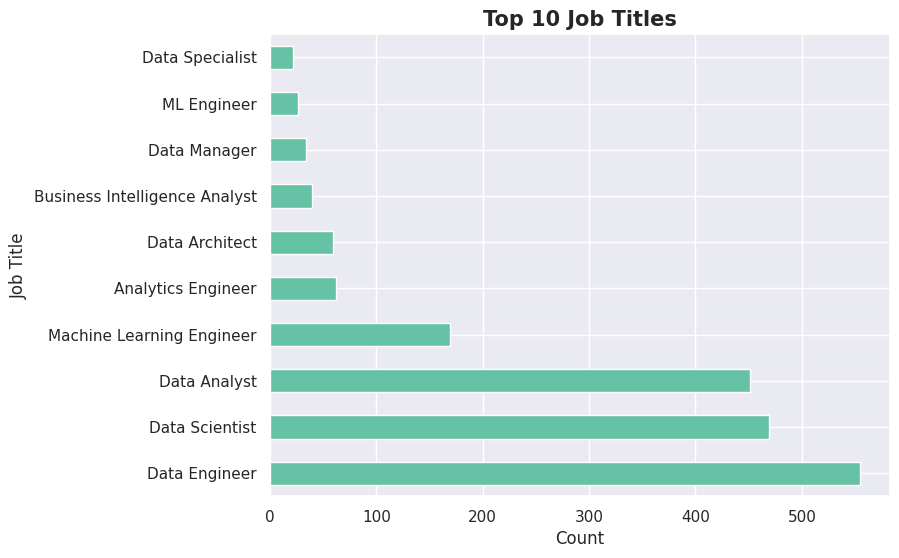

In [80]:
plt.figure(figsize=(8,6))
colors = sns.color_palette("Set2", 5)
df["Short_JobTitle"].value_counts().nlargest(10).plot(kind="barh",color=colors[0])
plt.title("Top 10 Job Titles",fontsize = 15, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

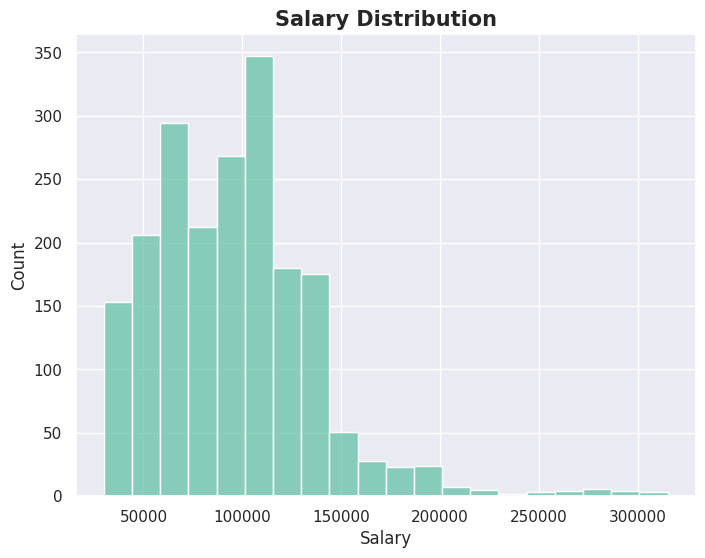

In [79]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="Salary",bins=20,color=colors[0])
plt.title("Salary Distribution",fontsize = 15, fontweight='bold')
plt.xlabel("Salary")
plt.ylabel("Count")

plt.show()

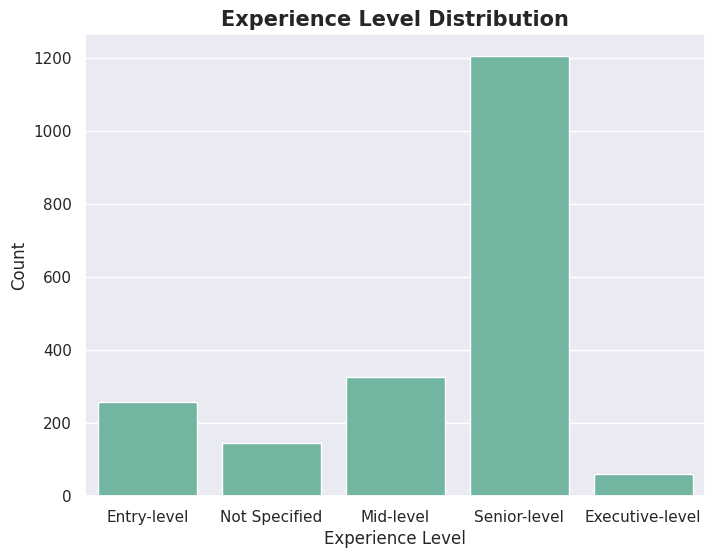

In [78]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="ExperienceLevel",color=colors[0])
plt.title("Experience Level Distribution",fontsize = 15, fontweight='bold')
plt.xlabel("Experience Level")
plt.ylabel("Count")


plt.show()

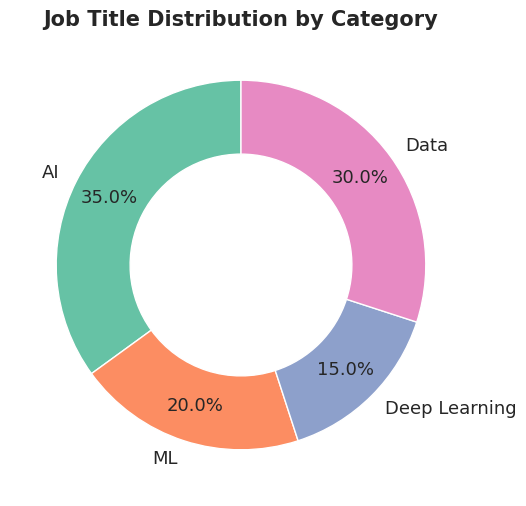

In [76]:
# Doughnut Chart
grouped_categories = {
    'AI': ['AI Engineer', 'AI Research Scientist', 'AI Architect', 'AI Consultant', 'AI Product Manager',
           'AI Software Engineer', 'AI Research Engineer'],
    'ML': ['Machine Learning Engineer', 'ML Engineer', 'Machine Learning Infrastructure Engineer','NLP Engineer'],
    'Deep Learning': ['Deep Learning Engineer','Robotics Engineer','Computer Vision Engineer'],
    'Data':['Data','BI','Analytics','Business Intelligence Analyst','Devops Engineer','Insight Analyst']
}
#counts for grouped categories
grouped_counts = [len(titles) for titles in grouped_categories.values()]
colors = sns.color_palette("Set2", 12)
category_labels = list(grouped_categories.keys())
plt.figure(figsize=(8,6))
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
plt.pie(grouped_counts, labels=category_labels, colors=colors, startangle=90, wedgeprops=dict(width=0.4), autopct='%1.1f%%', pctdistance=0.8, textprops={'fontsize': 13})
# Add a title
plt.title('Job Title Distribution by Category',fontsize = 15, fontweight='bold')
plt.show()

In [55]:
df_sorted = df.sort_values('Short_JobTitle')
# Calculate the average salary by Short Job Title
avg_salary = df_sorted.groupby('Short_JobTitle')['Salary'].mean()

Text(0, 0.5, 'Job Title')

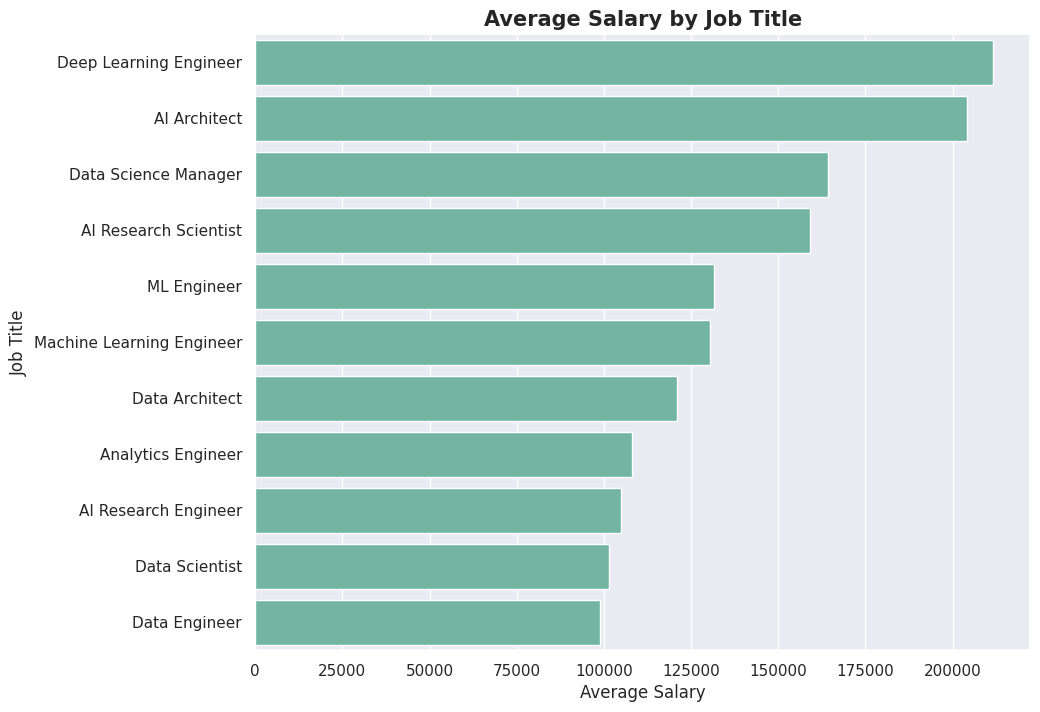

In [56]:
plt.figure(figsize=(8,6))
avg_salary = avg_salary.sort_values(ascending=False)
sns.barplot(y=avg_salary.index[:11], x=avg_salary.values[:11], color=colors[0])
plt.title('Average Salary by Job Title',fontsize = 15, fontweight='bold')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')

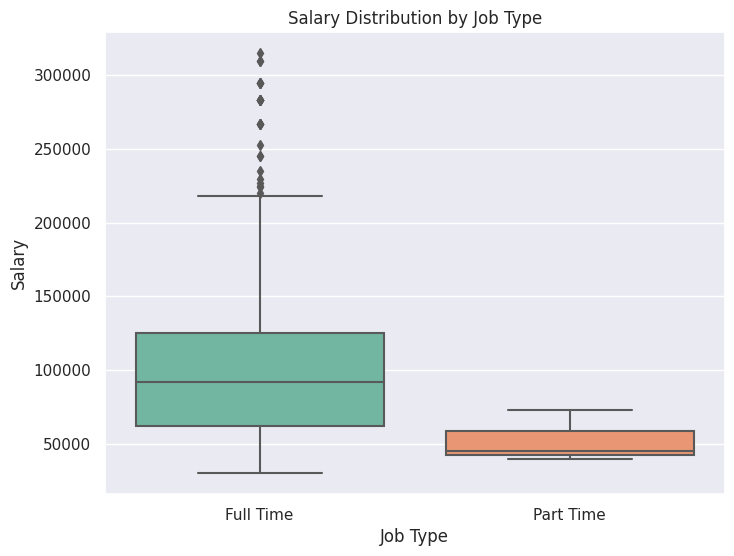

In [75]:
plt.figure(figsize=(8,6))
sns.set_palette('Set2')
sns.boxplot(data=df, x='JobType', y='Salary')
plt.title('Salary Distribution by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Salary')
plt.xticks(rotation=0)
plt.show()
#Analyze the distribution of salaries by job type using a box plot.

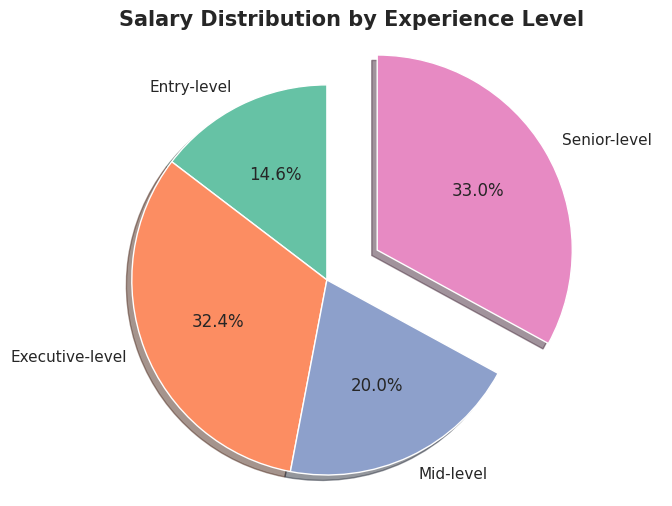

In [83]:
avg_salary_by_experience = df.groupby('ExperienceLevel')['Salary'].mean()

# Create a pie chart
plt.figure(figsize=(8,6))
avg_salary_by_experience = avg_salary_by_experience.drop('Not Specified')
#plt.pie(avg_salary_by_experience, labels=avg_salary_by_experience.index, autopct='%1.1f%%', startangle=90,colors=colors, shadow=True, explode=[0,0,0,0,0.3])
plt.pie(avg_salary_by_experience, labels=avg_salary_by_experience.index, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True, explode=[0,0,0,0.3])
plt.title('Salary Distribution by Experience Level',fontsize = 15, fontweight='bold')
plt.axis('equal')
plt.show()

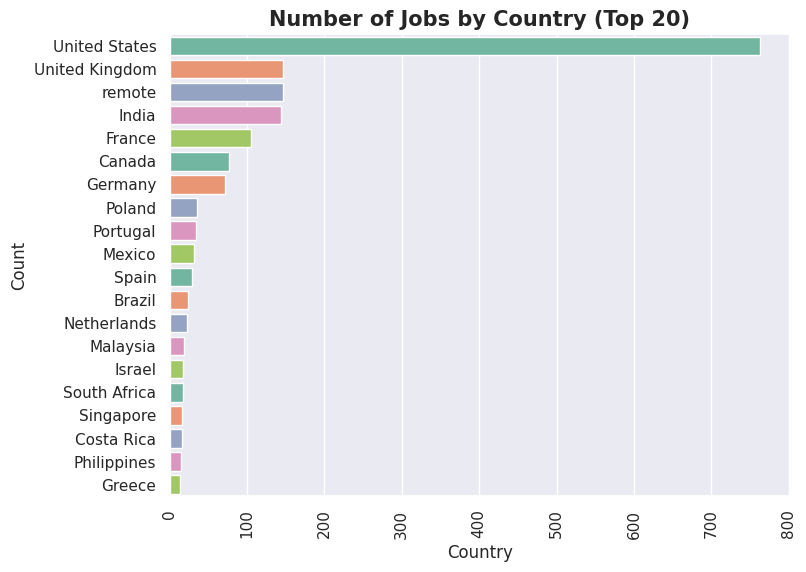

In [82]:
# Select the top 20 countries by job count
top_20_countries = df['Country'].value_counts().head(20)
plt.figure(figsize=(8,6))
sns.countplot(y='Country', data=df, order=top_20_countries.index,palette=colors )
plt.title('Number of Jobs by Country (Top 20)',fontsize = 15, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

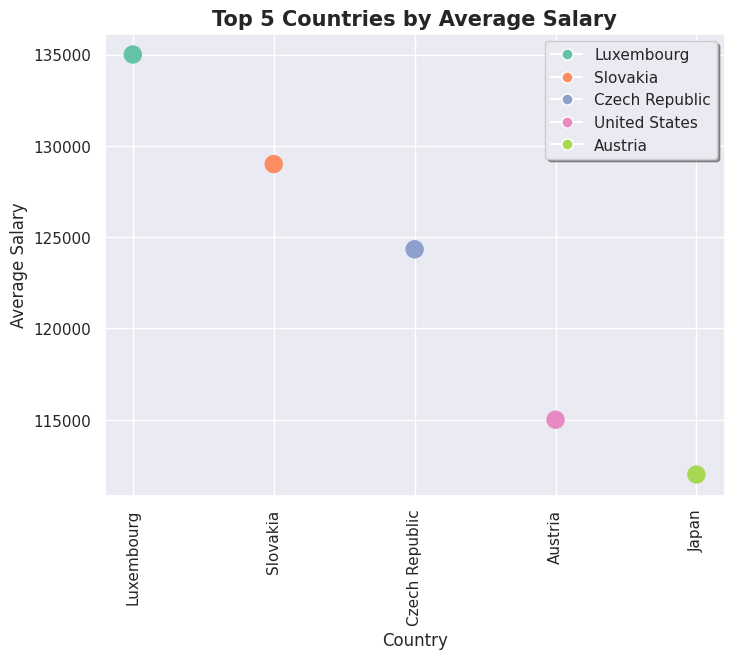

In [81]:
avg_salary_by_country = df.groupby('Country')['Salary'].mean().sort_values(ascending=False)

# Select the top 5 countries
top_5_countries = avg_salary_by_country.head(5)
colors = sns.color_palette("Set2", 5)
plt.figure(figsize=(8,6))
plt.scatter(x=top_5_countries.index, y=top_5_countries.values, s=150,c=colors)
legend_labels = ['Luxembourg', 'Slovakia', 'Czech Republic', 'United States', 'Austria']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in colors]
plt.legend(legend_elements, legend_labels, shadow=True, loc='upper right')
plt.title('Top 5 Countries by Average Salary',fontsize = 15, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_325/484298040.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)


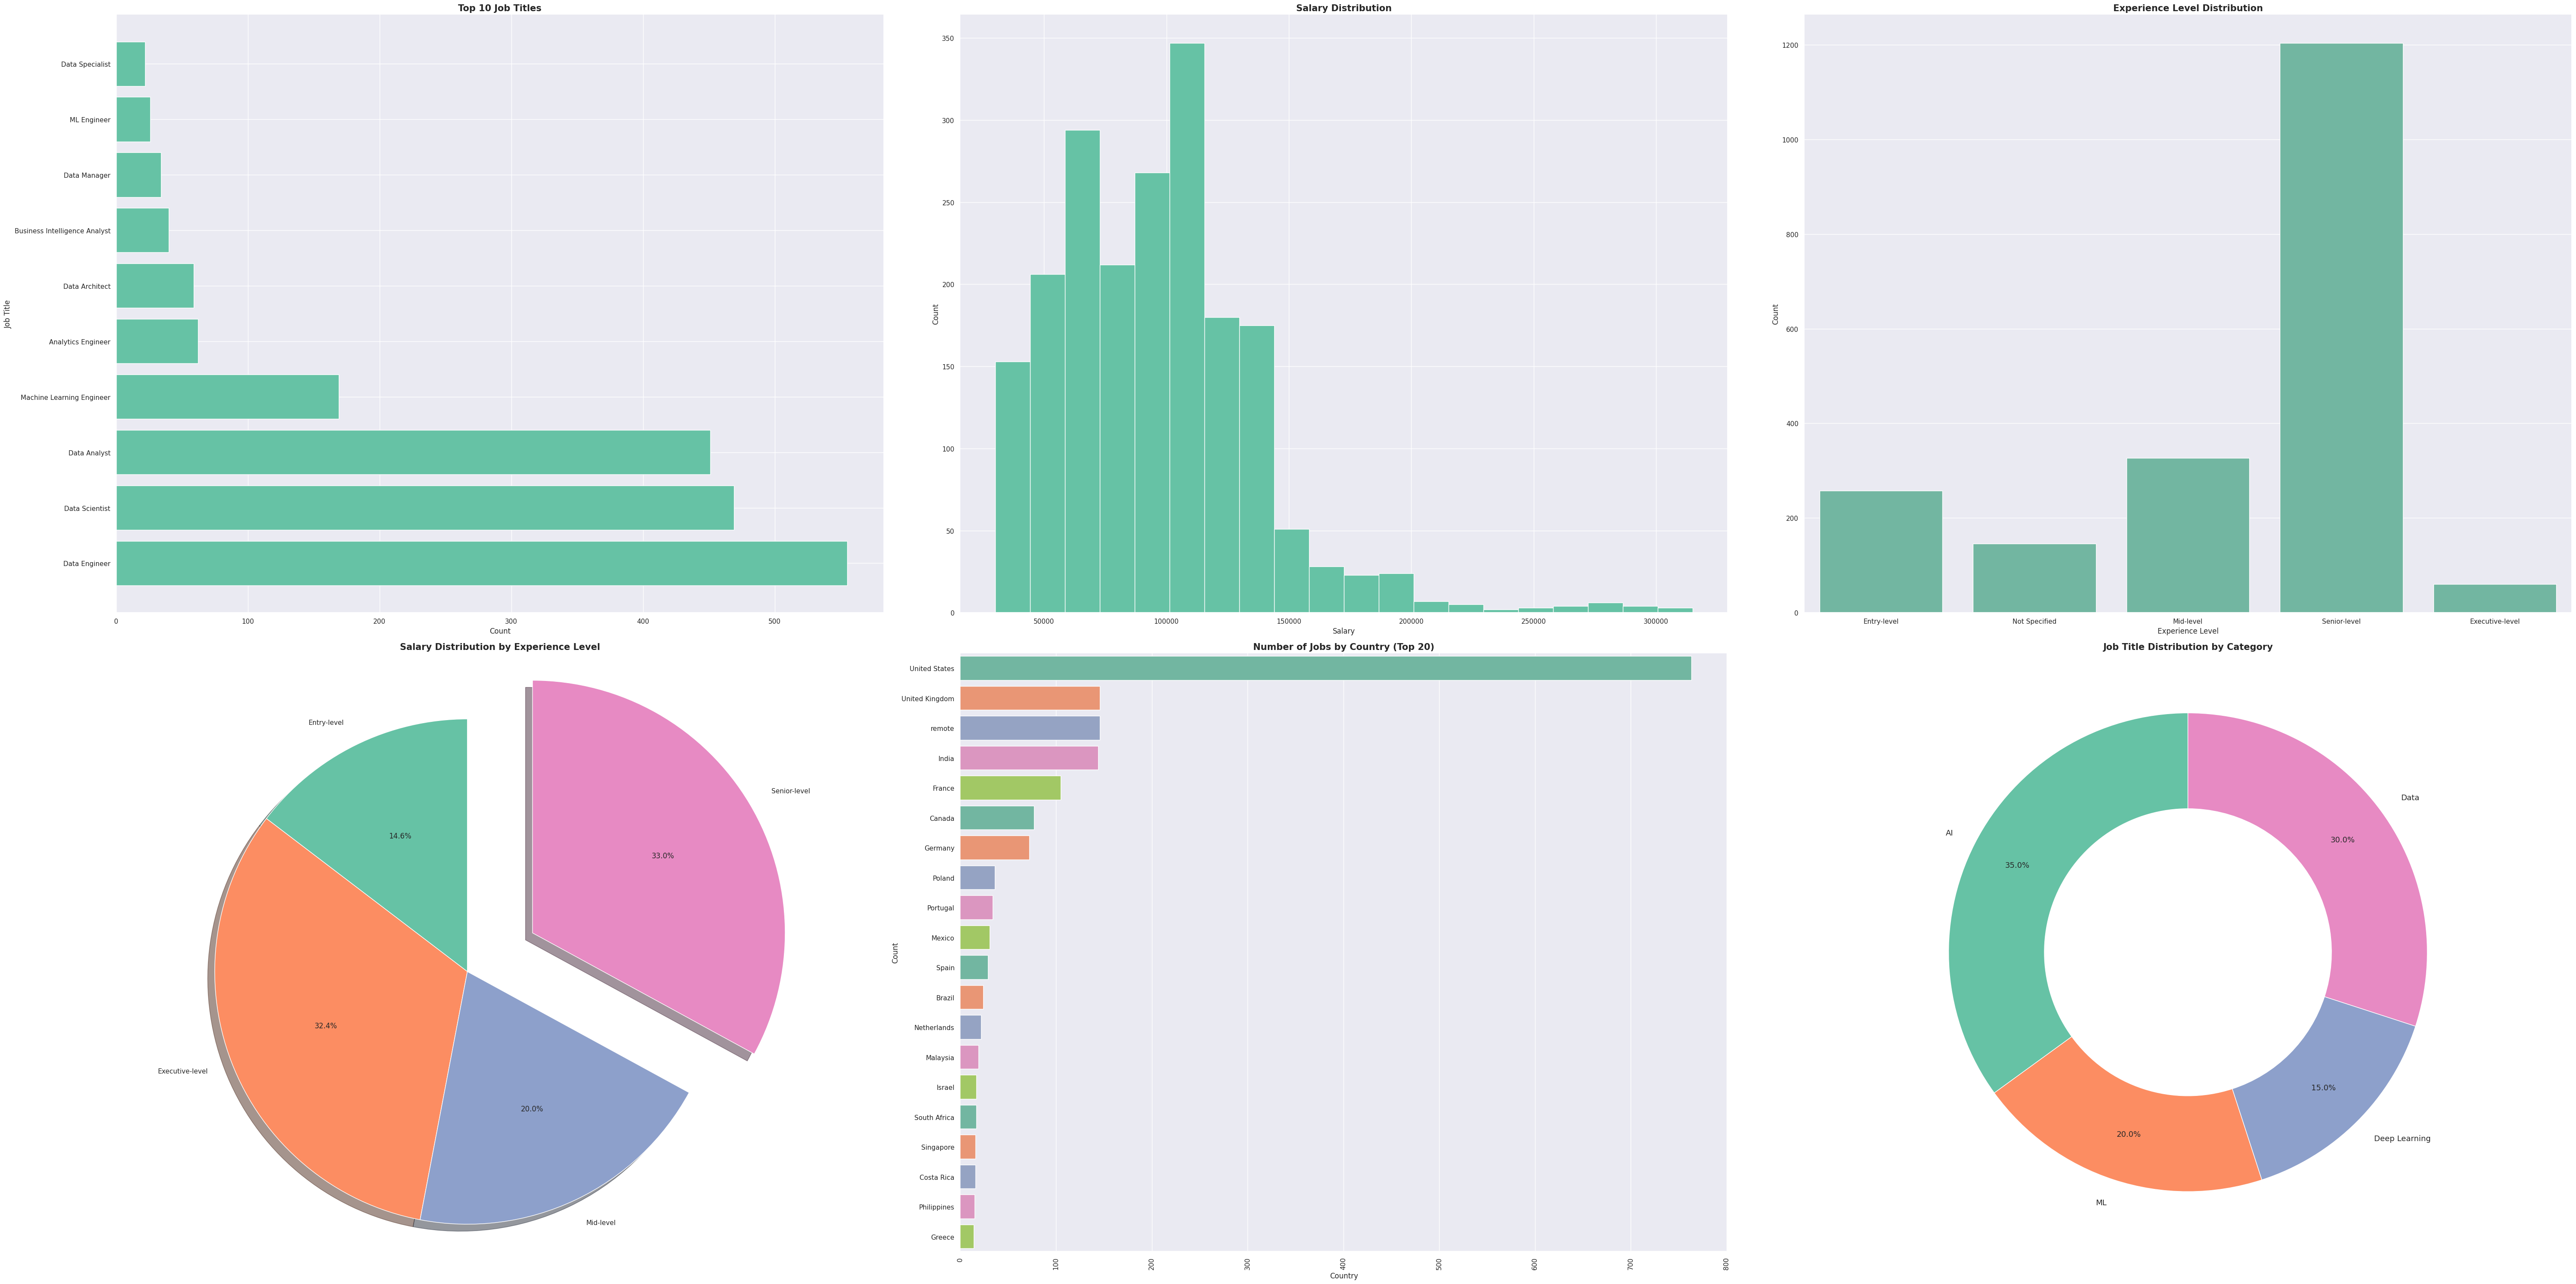

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(60, 30))


# subplot 1
axes[0, 0].barh(df["Short_JobTitle"].value_counts().nlargest(10).index, df["Short_JobTitle"].value_counts().nlargest(10))
axes[0, 0].set_title("Top 10 Job Titles" ,fontsize=15, fontweight='bold')
axes[0, 0].set_xlabel("Count")
axes[0, 0].set_ylabel("Job Title")

# subplot 2
axes[0, 1].hist(df["Salary"], bins=20)
axes[0, 1].set_title("Salary Distribution",fontsize=15, fontweight='bold')
axes[0, 1].set_xlabel("Salary")
axes[0, 1].set_ylabel("Count")

# subplot 3
sns.countplot(data=df, x="ExperienceLevel", ax=axes[0, 2],color=colors[0])
axes[0, 2].set_title("Experience Level Distribution",fontsize=15, fontweight='bold')
axes[0, 2].set_xlabel("Experience Level")
axes[0, 2].set_ylabel("Count")

# # subplot 4
# sns.barplot(y=avg_salary.index[:11], x=avg_salary.values[:11], color=colors[0], ax=axes[0, 3])
# axes[0, 3].set_title("Average Salary by Job Title",fontsize=15, fontweight='bold')
# axes[0, 3].set_xlabel("Average Salary")
# axes[0, 3].set_ylabel("Job Title")


# subplot 5
# sns.boxplot(data=df, x="JobType", y="Salary", ax=axes[0, 4])
# axes[0, 4].set_title("Salary Distribution by Job Type",fontsize=15, fontweight='bold')
# axes[0, 4].set_xlabel("Job Type")
# axes[0, 4].set_ylabel("Salary")
# axes[0, 4].set_xticklabels(axes[0, 4].get_xticklabels(), rotation=90)


# subplot 6
axes[1, 0].pie(avg_salary_by_experience, labels=avg_salary_by_experience.index, autopct="%1.1f%%", startangle=90, colors=colors, shadow=True, explode=[0,0, 0, 0.3]   )
axes[1, 0].set_title("Salary Distribution by Experience Level",fontsize=15, fontweight='bold')
axes[1, 0].axis("equal")

# subplot 7
sns.countplot(y="Country", data=df, order=top_20_countries.index, palette=colors, ax=axes[1, 1])
axes[1, 1].set_title("Number of Jobs by Country (Top 20)",fontsize=15, fontweight='bold')
axes[1, 1].set_xlabel("Country")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)



# subplot 8
axes[1, 2].pie(grouped_counts, labels=category_labels, colors=colors, startangle=90, wedgeprops=dict(width=0.4), autopct='%1.1f%%', pctdistance=0.8, textprops={'fontsize': 13})
axes[1, 2].set_title('Job Title Distribution by Category', fontsize=15, fontweight='bold')



# subplot 9
# axes[0, 3].plot(avg_salary.index, avg_salary.values, marker='o', color=colors[0])
# axes[0, 3].set_title('Average Salary by Job Title', fontsize=15, fontweight='bold')
# axes[0, 3].set_xlabel('Short Job Title')
# axes[0, 3].set_ylabel('Average Salary')
# axes[0, 3].set_xticklabels(avg_salary.index, rotation=90)




# # subplot 10
# axes[1, 3].scatter(top_5_countries.index, top_5_countries.values, s=150, c=colors)
# legend_labels = ['Luxembourg', 'Slovakia', 'Czech Republic', 'United States', 'Austria']
# legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in colors]
# axes[1, 3].legend(legend_elements, legend_labels, shadow=True, loc='upper right')
# axes[1, 3].set_title('Top 5 Countries by Average Salary', fontsize=15, fontweight='bold')
# axes[1, 3].set_xlabel('Country')
# axes[1, 3].set_ylabel('Average Salary')
# axes[1, 3].set_xticklabels(top_5_countries.index, rotation=90)





plt.tight_layout()
plt.show()

In [62]:
#split the job requirements for each job 
df_job_skills = df.copy()
df_job_skills['JobRequirements'] = df['JobRequirements'].str.split(',')
df_job_skills = df_job_skills.explode('JobRequirements', ignore_index=True)
df_job_skills =  df_job_skills[['Short_JobTitle','Field', 'JobRequirements']]

#split the job requirements for each Field in different lists
Data = df_job_skills.groupby(['Field'])['JobRequirements'].value_counts().loc['Data']
AI = df_job_skills.groupby(['Field'])['JobRequirements'].value_counts().loc['Artificial Intelligence']
ML = df_job_skills.groupby(['Field'])['JobRequirements'].value_counts().loc['Machine Learning']
DL = df_job_skills.groupby(['Field'])['JobRequirements'].value_counts().loc['Deep Learning']

In [63]:
#drop null values
AI.drop(labels=[''],inplace=True)

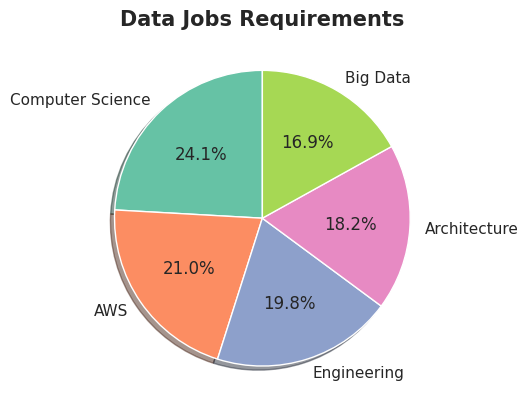

In [64]:
plt.pie(Data.values[:5], labels=Data.index[:5], autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.title("Data Jobs Requirements", fontsize=15, fontweight='bold')
plt.savefig('data_jobs_requirements.png',dpi=300)

Text(0.5, 1.0, 'AI Jobs Requirements')

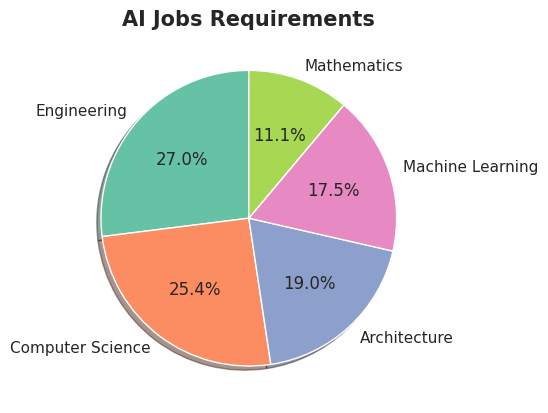

In [65]:
plt.pie(AI.values[:5], labels=AI.index[:5], autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.title("AI Jobs Requirements", fontsize=15, fontweight='bold')
#plt.savefig('AI_jobs_requirements.png',dpi=300)

Text(0.5, 1.0, 'ML Jobs Requirements')

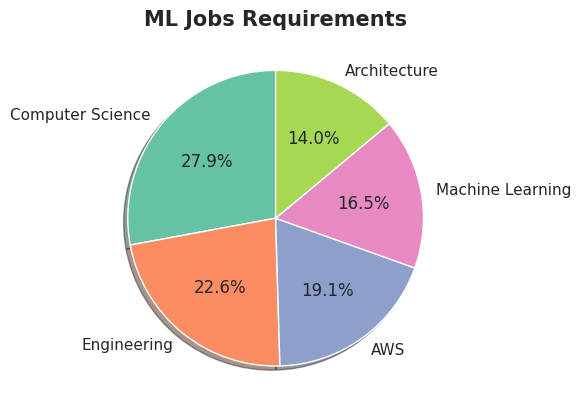

In [66]:
plt.pie(ML.values[:5], labels=ML.index[:5], autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.title("ML Jobs Requirements", fontsize=15, fontweight='bold')
#plt.savefig('ML_jobs_requirements.png',dpi=300)

Text(0.5, 1.0, 'DL Jobs Requirements')

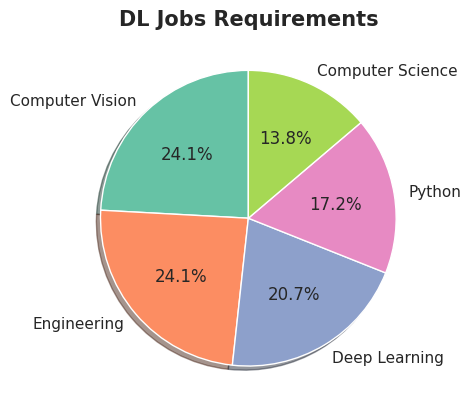

In [67]:
plt.pie(DL.values[:5], labels=DL.index[:5], autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.title("DL Jobs Requirements", fontsize=15, fontweight='bold')
#plt.savefig('DL_jobs_requirements.png',dpi=300)

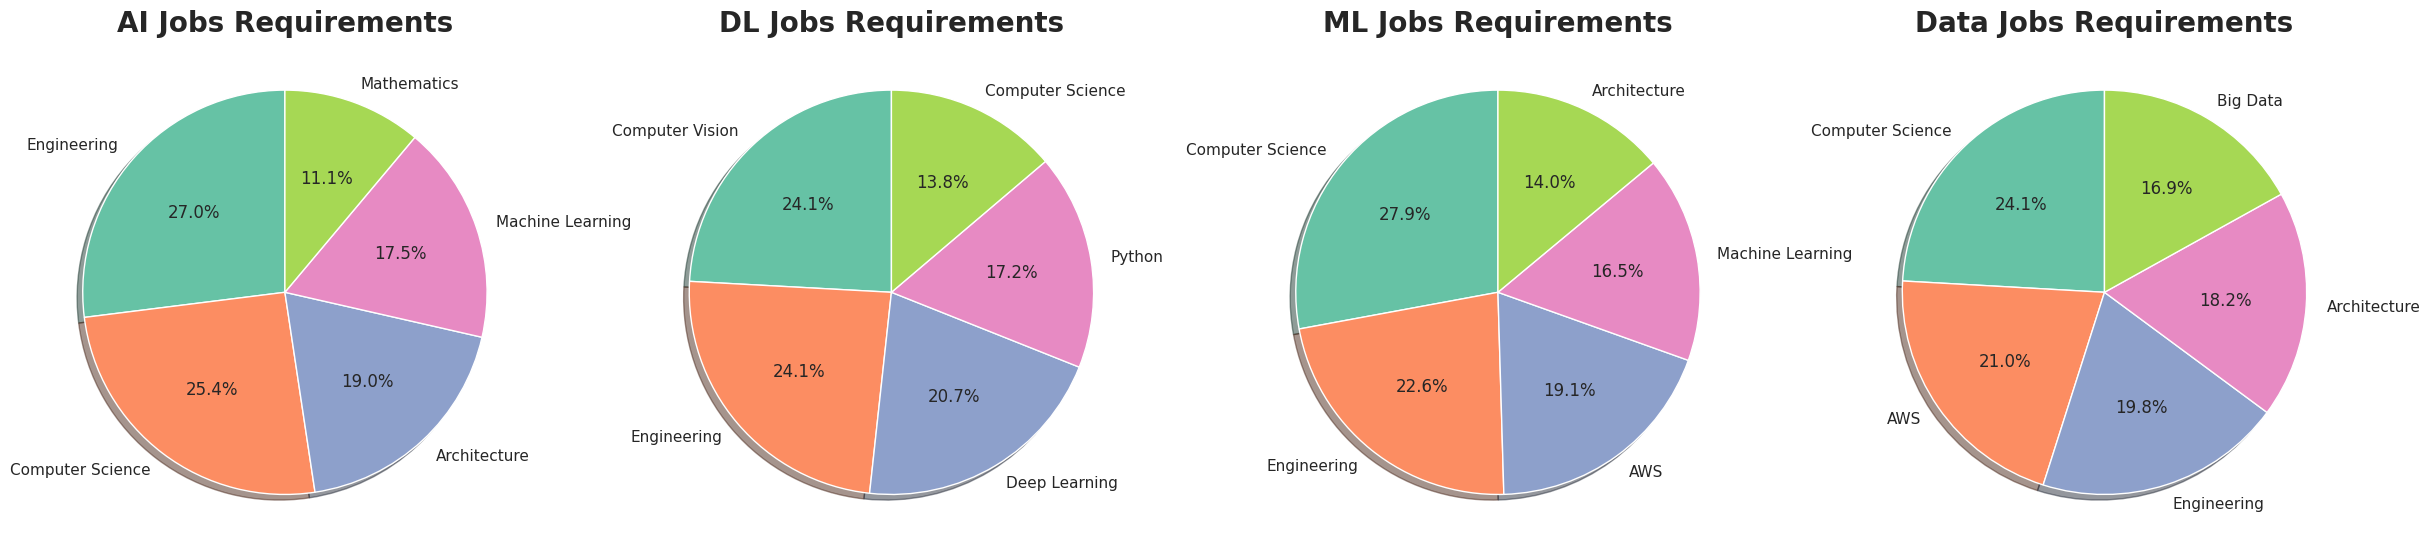

In [68]:
fig ,ax =plt.subplots(1,4,figsize=(30,10))
ax[0].pie(AI.values[:5], labels=AI.index[:5], autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
ax[0].set_title("AI Jobs Requirements", fontsize=20, fontweight='bold')

ax[1].pie(DL.values[:5], labels=DL.index[:5], autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
ax[1].set_title("DL Jobs Requirements", fontsize=20, fontweight='bold')


ax[2].pie(ML.values[:5], labels=ML.index[:5], autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
ax[2].set_title("ML Jobs Requirements", fontsize=20, fontweight='bold')



ax[3].pie(Data.values[:5], labels=Data.index[:5], autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
ax[3].set_title("Data Jobs Requirements",fontsize=20, fontweight='bold')

plt.show()

In [69]:
!pip install pandas_profiling==3.6.6

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [70]:
from pandas_profiling import ProfileReport

/tmp/ipykernel_325/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [71]:
!pip install ipywidgets==8.1.0

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [72]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
profile.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0ff6a6cf-3adf-435d-b30a-0d11ebbef82a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>